In [1]:
import os
import sys
import glob
import numpy as np
import scipy as sp
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt

from scipy.stats import rayleigh
from scipy.stats import ks_2samp
from numpy import linspace
from numpy.random import choice
from networkx import Graph

from learning_dist_metrics.ldm import LDM
from learning_dist_metrics.dist_metrics import weighted_euclidean

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_PATH = "./data/sim_data_yi/" 

users_df   = pd.read_csv(DATA_PATH + "users_profile.csv", header = 0, sep = ",")
friends_df = pd.read_csv(DATA_PATH + "friendships.csv", header = 0, sep = ",")
dist_df    = pd.read_csv(DATA_PATH + "dist_mat.csv", header = 0, sep = ",")

friends_df = friends_df[friends_df.isFriend == 1]
friends_df["pair"] = friends_df[["uid_a", "uid_b"]].apply(lambda x: (int(x[0]), int(x[1])), axis=1)
friends_df.drop("isFriend", axis=1, inplace=True)
friends_df = friends_df[["pair", "uid_a", "uid_b"]]
friends_df.head(3)

cols = ["x0", "x1", "x2", "x3", "x4", "x5"]

## subset users data to retain profile only
profile_df = users_df[["ID"] + cols]
all_user_ids = list(set(users_df.ID))

In [3]:
from GWDLearner import *

In [4]:
profile_df = profile_df      # user profile
friends_ls = friends_df.pair # user relationship 

res = learning_wrapper(profile_df=profile_df, friends_pair=friends_ls, 
                       k=2, c=0.1, dropout_rate=0.2, fit_rayleigh=True, verbose=True)

Initiating ...
1 iteration is in processing ...
--- 26.33 seconds ---
--- 31.10 seconds ---
1) #fit: 89, #unfit: 11, #buffer: 0
1) #fit: 89, #unfit: 11, #buffer: 0
1) #fit: 97, #unfit: 0, #buffer: 3
2 iteration is in processing ...
--- 24.18 seconds ---
--- 20.67 seconds ---
1) #fit: 87, #unfit: 10, #buffer: 3
1) #fit: 87, #unfit: 10, #buffer: 3
1) #fit: 93, #unfit: 0, #buffer: 7
** dropout is activating ...

3 iteration is in processing ...
--- 23.49 seconds ---
--- 20.62 seconds ---
1) #fit: 80, #unfit: 13, #buffer: 7
1) #fit: 83, #unfit: 13, #buffer: 4
1) #fit: 90, #unfit: 0, #buffer: 10
** dropout is activating ...

4 iteration is in processing ...
--- 20.27 seconds ---
--- 19.30 seconds ---
1) #fit: 85, #unfit: 5, #buffer: 10
1) #fit: 89, #unfit: 5, #buffer: 6
1) #fit: 92, #unfit: 0, #buffer: 8
** dropout is activating ...

5 iteration is in processing ...
--- 24.53 seconds ---
--- 22.00 seconds ---
1) #fit: 81, #unfit: 11, #buffer: 8
1) #fit: 81, #unfit: 11, #buffer: 8
1) #fit: 8

In [5]:
import json
with open('data.txt', 'w') as outfile:
    json.dump(data, outfile)

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [5]:
os.getcwd()

'/home/beingzy/Documents/projects/phd_experiment'

In [6]:
a, b, c = res

In [16]:
g0_sizes = [len(i['fit_group'][0]) for i in c]
g1_sizes = [len(i['fit_group'][1]) for i in c]

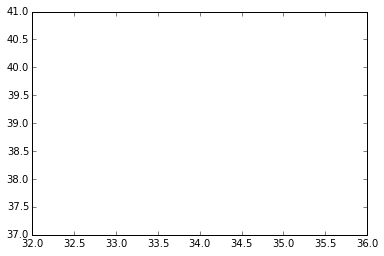

In [17]:
plt.plot(g0_sizes, g1_sizes)

In [19]:
g1_sizes

[39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39]